# CRYPTOMACHINE

## Vamos a importar las siguientes librerías para realizar el ML.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import yfinance as yf
import math
import os.path
import time

In [2]:
cryptocurrencies = ['BTC-USD']
bitcoin_df = yf.download(cryptocurrencies, start='2019-01-01',
                end='2022-03-01', parse_dates = ['Month'])

[*********************100%***********************]  1 of 1 completed


In [3]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1156 entries, 2018-12-31 to 2022-02-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1156 non-null   float64
 1   High       1156 non-null   float64
 2   Low        1156 non-null   float64
 3   Close      1156 non-null   float64
 4   Adj Close  1156 non-null   float64
 5   Volume     1156 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 63.2 KB


In [4]:
bitcoin_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1.156000e+03
mean,22895.319287,23500.041618,22232.171545,22925.611185,22925.611185,3.201122e+10
std,19133.543234,19651.639045,18524.038667,19128.549349,19128.549349,2.020354e+10
min,3401.376465,3427.945557,3391.023682,3399.471680,3399.471680,4.324201e+09
25%,8319.130859,8510.423340,8183.221436,8321.569092,8321.569092,1.887529e+10
50%,10904.803223,11101.397949,10652.977539,10914.254395,10914.254395,2.852390e+10
75%,40190.073242,41607.629883,38749.082031,40292.477539,40292.477539,4.015852e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [5]:
bitcoin_df["Volume"] = bitcoin_df["Volume"].astype("float")
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1156 entries, 2018-12-31 to 2022-02-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1156 non-null   float64
 1   High       1156 non-null   float64
 2   Low        1156 non-null   float64
 3   Close      1156 non-null   float64
 4   Adj Close  1156 non-null   float64
 5   Volume     1156 non-null   float64
dtypes: float64(6)
memory usage: 63.2 KB


In [6]:
bitcoin_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,3866.839111,3868.742920,3725.867432,3742.700439,3742.700439,4.661841e+09
2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4.324201e+09
2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5.244857e+09
2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4.530215e+09
2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4.847965e+09


In [49]:
#bitcoin_df.index = bitcoin_df['Date']

In [7]:
bitcoin_df = bitcoin_df.drop(columns = ['Adj Close'])

In [8]:
bitcoin_df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2018-12-31,3866.839111,3868.742920,3725.867432,3742.700439,4.661841e+09
2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,4.324201e+09
2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,5.244857e+09
2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,4.530215e+09
2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,4.847965e+09


In [52]:
# bitcoin_df['y'] = bitcoin_df['Close']   

In [9]:
bitcoin_df.info()
print('\n')
print('Número de muestras', bitcoin_df.shape[0])
print('Número de variables', bitcoin_df.shape[1])

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1156 entries, 2018-12-31 to 2022-02-28
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1156 non-null   float64
 1   High    1156 non-null   float64
 2   Low     1156 non-null   float64
 3   Close   1156 non-null   float64
 4   Volume  1156 non-null   float64
dtypes: float64(5)
memory usage: 54.2 KB


Número de muestras 1156
Número de variables 5


## ANÁLISIS EXPLORATORIO

In [10]:
close = bitcoin_df['Close']

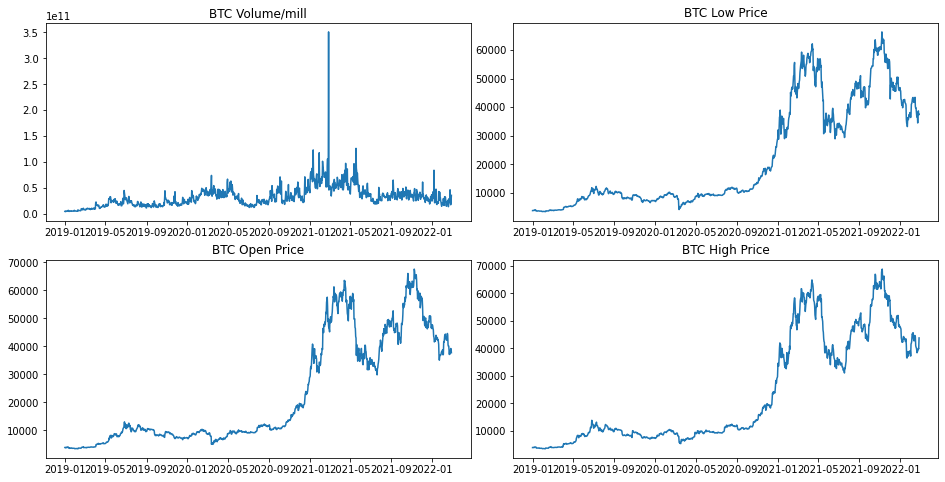

In [11]:
fig, axs =plt.subplots(2,2,figsize=(16,8),gridspec_kw ={'hspace': 0.2, 'wspace': 0.1})
axs[0,0].plot(bitcoin_df['Volume'])
axs[0,0].set_title('BTC Volume/mill')
axs[0,1].plot(bitcoin_df['Low'])
axs[0,1].set_title('BTC Low Price')
axs[1,0].plot(bitcoin_df['Open'])
axs[1,0].set_title('BTC Open Price')
axs[1,1].plot(bitcoin_df['High'])
axs[1,1].set_title('BTC High Price')

plt.show()

In [13]:
""" Vamos a medir la correlación entre las variables
 y comprobaremos a continuación cuáles son las más importantes 
 intentando conocer qué variables independientes
 afectan en mayor medida al modelo que vamos a utilizar. """

bitcoin_features = bitcoin_df
features = ['Open', 'High', 'Low', 'Volume']
X_bitcoin = bitcoin_features[features]
y_bitcoin = bitcoin_features['Close']

In [57]:
# TENEMOS QUE DROPEAR LA COLUMNA ADJ CLOSE Y LA COLUMNA "y".

In [14]:
bitcoin_df.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999262,0.998614,0.998155,0.498174
High,0.999262,1.000000,0.998526,0.999197,0.505522
Low,0.998614,0.998526,1.000000,0.999040,0.482326
Close,0.998155,0.999197,0.999040,1.000000,0.495624
Volume,0.498174,0.505522,0.482326,0.495624,1.000000


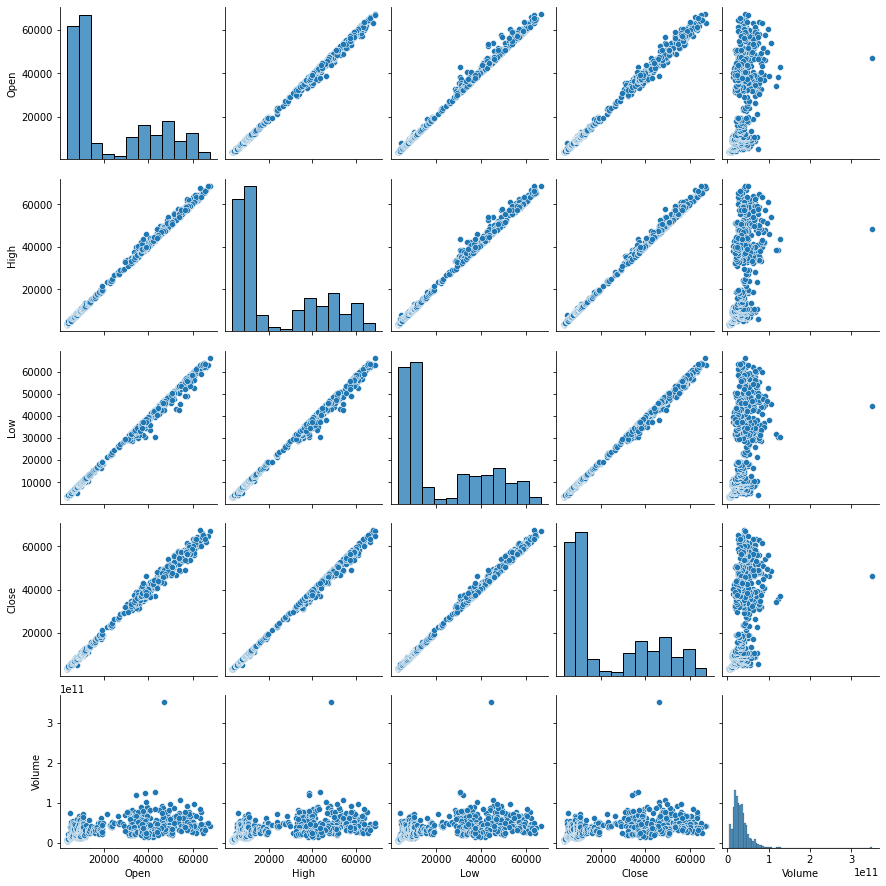

In [15]:
sns.pairplot(bitcoin_df);

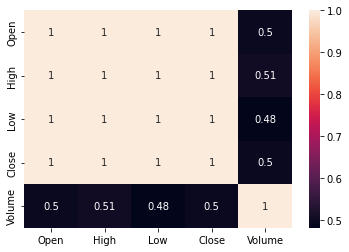

In [16]:
sns.heatmap(bitcoin_df.corr(), annot=True);

C:\Users\david\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


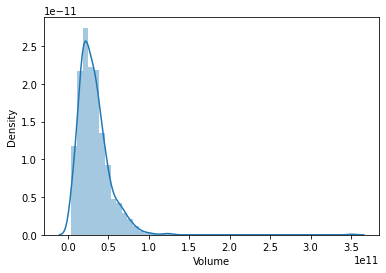

In [17]:
sns.distplot(bitcoin_df['Volume']);

C:\Users\david\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


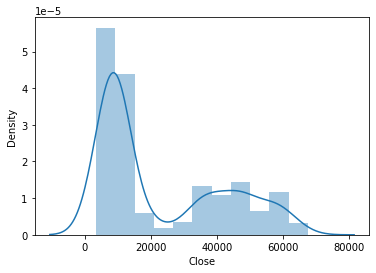

In [18]:
sns.distplot(bitcoin_df['Close']);

## 1). MODELO DE REGRESIÓN LINEAL

In [19]:
X_bitcoin.columns


Index(['Open', 'High', 'Low', 'Volume'], dtype='object')

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_bitcoin, y_bitcoin, test_size = 0.30, random_state = 42)

In [21]:
print("Total features shape:", X_bitcoin.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (1156, 4)
Train features shape: (809, 4)
Train target shape: (809,)
Test features shape: (347, 4)
Test target shape: (347,)


In [22]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [23]:
print('Intercepto:', lm.intercept_)
print('Coeficientes:', lm.coef_)

Intercepto: -9.685639228864602
Coeficientes: [-5.19276540e-01  9.12330077e-01  6.00220843e-01  1.49535928e-09]


In [24]:
coeff_df = pd.DataFrame(lm.coef_,
                        X_bitcoin.columns,
                        columns=['Coefficient'])
coeff_df

,Coefficient
Open,-5.192765e-01
High,9.123301e-01
Low,6.002208e-01
Volume,1.495359e-09


In [25]:
X_test

,Open,High,Low,Volume
Date,,,,
2021-07-28,39503.187500,40816.070312,38862.437500,3.870240e+10
2019-09-22,10024.115234,10074.444336,9922.533203,1.319965e+10
2019-04-19,5298.154297,5336.680176,5233.334961,1.378024e+10
2019-10-26,8667.577148,10021.744141,8662.622070,4.449626e+10
2021-01-21,35549.398438,35552.679688,30250.750000,7.564307e+10
...,...,...,...,...
2020-10-15,11426.602539,11569.914062,11303.603516,2.448723e+10
2021-05-22,37371.031250,38831.054688,35383.683594,5.737727e+10
2020-06-28,9048.460938,9197.546875,8975.525391,1.456087e+10


In [26]:
predictions = lm.predict(X_test)
predictions

array([40098.88340506,  9951.69452768,  5269.68409456,  9898.60770249,
       32236.36896629,  9227.75666985, 36434.51441308,  9107.02976604,
       41321.94736215, 11789.69964673,  7264.68048424,  8713.55765394,
        7860.45298095, 35458.97466048,  5918.67468677, 46937.47877566,
       37110.36535402, 48792.93259522, 49836.57753225, 47468.24137021,
       57174.24899191, 39437.68246228,  3905.42611127,  9223.32325573,
       32272.96533444, 11265.37064772,  8708.95670313,  6781.87461389,
        9320.84987619, 40894.97070607,  9890.91948527,  6865.21575343,
        3893.01232097,  7544.71150429, 48398.87030718,  7834.1593108 ,
       38664.03849213, 37863.79626161, 58961.60143213,  8397.47738655,
       40834.08926281, 50454.07410103, 54328.66874509, 10690.38577548,
       11063.35806808,  7241.06355683, 38174.73076509, 34145.22983058,
        8562.68826588, 45481.12223801, 48261.99101824, 18584.41791362,
        9725.16667021,  4054.0027821 , 10582.23543715, 40449.59079288,
      

C:\Users\david\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


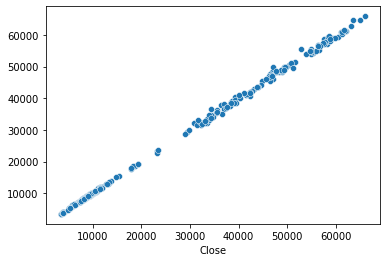

In [27]:
sns.scatterplot(y_test, predictions);

In [28]:
new_price = np.array([[29000, 30000, 27000, 8],
                    [25000, 40000, 25000, 5]])

lm.predict(new_price)

C:\Users\david\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([28507.15977115, 38507.12501065])

C:\Users\david\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close', ylabel='Density'>

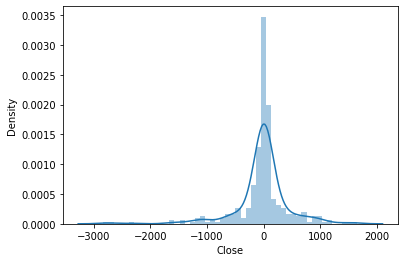

In [29]:
sns.distplot((y_test - predictions))

In [30]:
from sklearn import metrics

lm.score(X_test, y_test)


0.9993669036547531

In [31]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 259.2466931331841
MSE: 228187.82491018655
RMSE: 477.6900929579622


In [32]:
intercept = lm.intercept_
features = pd.DataFrame(lm.coef_, X_train.columns, columns=['coefficient'])
features.head().sort_values('coefficient', ascending=True)

,coefficient
Open,-5.192765e-01
Volume,1.495359e-09
Low,6.002208e-01
High,9.123301e-01


In [33]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_scal = std_scale.transform(X_train)

lm_scal = LinearRegression()
lm_scal.fit(X_train_scal, y_train)

intercept_scal = lm_scal.intercept_
features_std = pd.DataFrame(lm_scal.coef_, X_train.columns, columns=['Coefficient'])

features_std.sort_values('Coefficient', ascending=False)

,Coefficient
High,17972.356620
Low,11144.356518
Volume,26.639505
Open,-9967.216388


In [34]:
bitcoin_df.describe()

,Open,High,Low,Close,Volume
count,1156.000000,1156.000000,1156.000000,1156.000000,1.156000e+03
mean,22895.319287,23500.041618,22232.171545,22925.611185,3.201122e+10
std,19133.543234,19651.639045,18524.038667,19128.549349,2.020354e+10
min,3401.376465,3427.945557,3391.023682,3399.471680,4.324201e+09
25%,8319.130859,8510.423340,8183.221436,8321.569092,1.887529e+10
50%,10904.803223,11101.397949,10652.977539,10914.254395,2.852390e+10
75%,40190.073242,41607.629883,38749.082031,40292.477539,4.015852e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,3.509679e+11


In [35]:
X = bitcoin_df[['Open', 'High', 'Low', 'Volume']]

y = bitcoin_df['Close']


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

lr = LinearRegression(n_jobs=-1) 
lr.fit(X_train, y_train)

predictions = lm.predict(X_test)
predictions
lr.fit(X, y)

# A little bit lower without Avg. Area Number of Bedrooms
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 259.2466931331841
MSE: 228187.82491018655
RMSE: 477.6900929579622


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,\
                            roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix
                            
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

In [ ]:
### NO EJECUTAR ###

# Metricas de regresión



diamonds_df2 = pd.get_dummies(bitcoin_df)

lr = LinearRegression()
lr.fit(X, y)


print("Score del modelo (R^2):", round(lr.score(X, y), 4))
print("R^2 score:", round(r2_score(predictions, y), 4))
print("MAE score:", round(mean_absolute_error(predictions, y), 4))
print("MSE score:", round(mean_squared_error(predictions, y), 4))
print("RMSE score:", round(np.sqrt(mean_squared_error(predictions, y)), 4))

def mean_absolute_percentage_error(y_pred, y_true): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


print("MAPE score:", round(mean_absolute_percentage_error(predictions, y), 4))

In [37]:
# Load libraries
import numpy as np
import pickle
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# Set random seed
np.random.seed(42)

In [38]:
def my_function(df):
    df['columna1'] = SimpleImputer(strategy='mean')
    df['columna2'] = SimpleImputer(strategy='median')
    return df

In [39]:
reg_log = Pipeline(steps = [
    ("imputer", SimpleImputer()),
    ("scaler", StandardScaler()),
    ("reglog", LogisticRegression())
])
reg_log_param = {
    "imputer__strategy": ['mean', 'median'],
    "reglog__penalty": ['l1', 'l2'],
    "reglog__C": np.logspace(0, 4, 10)
}

In [40]:
def preprocessing(df):
    df = imputacion(df)
    df = estandarizar(df)
    modelo.fit(df)
    return model

In [41]:
bitcoin_df

,Open,High,Low,Close,Volume
Date,,,,,
2018-12-31,3866.839111,3868.742920,3725.867432,3742.700439,4.661841e+09
2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,4.324201e+09
2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,5.244857e+09
2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,4.530215e+09
2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,4.847965e+09
...,...,...,...,...,...
2022-02-24,37278.566406,38968.839844,34459.218750,38332.609375,4.638380e+10
2022-02-25,38333.746094,39630.324219,38111.343750,39214.218750,2.654560e+10
2022-02-26,39213.082031,40005.347656,38702.535156,39105.148438,1.746755e+10


In [42]:
reg_log = Pipeline(steps = [
    ("imputer", SimpleImputer()),
    ("scaler", StandardScaler()),
    # ("funcion", my_function())
    ("reglog", LogisticRegression())
])

rand_forest = RandomForestClassifier()

svm = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("selectkbest", SelectKBest()),
    ("svm", SVC())
])


reg_log_param = {
    "imputer__strategy": ['mean', 'median'],
    "reglog__penalty": ['l1', 'l2'],
    "reglog__C": np.logspace(0, 4, 10)
}
rand_forest_param = {
    "n_estimators": [10, 100, 1000],
    "max_features": [1,2,3]
}
svm_param = {
    'selectkbest__k': [2, 3, 4],
    'svm__kernel': ['linear', 'rbf', 'sigmoid', 'poly'],
    'svm__C': [0.001, 0.1, 0.5, 1, 5, 10, 100],
    'svm__degree': [1,2,3,4],
    'svm__gamma': ['scale', 'auto']
}


gs_reg_log = GridSearchCV(reg_log,
                         reg_log_param,
                         cv = 10,
                         scoring = 'accuracy',
                         verbose = 1,
                         n_jobs = -1)

gs_rand_forest = GridSearchCV(rand_forest,
                         rand_forest_param,
                         cv = 10,
                         scoring = 'accuracy',
                         verbose = 1,
                         n_jobs = -1)

gs_svm = GridSearchCV(svm,
                         svm_param,
                         cv = 10,
                         scoring = 'accuracy',
                         verbose = 1,
                         n_jobs = -1)

grids = {"gs_reg_log": gs_reg_log,
        "gs_rand_forest": gs_rand_forest,
        "gs_svm": gs_svm}

LogisticRegression(C=1, penalty='l2', solver='liblinear')

LogisticRegression(C=1, solver='liblinear')

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)


In [44]:
for nombre, grid_search in grids.items():
    grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


C:\Users\david\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
400 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\david\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\david\AppData\Local\Programs\Python\Python37\lib\sit

ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

In [45]:
print(gs_reg_log.best_score_)
print(gs_reg_log.best_params_)
print(gs_reg_log.best_estimator_)
print(gs_reg_log.best_estimator_['reglog'])

nan
{'imputer__strategy': 'mean', 'reglog__C': 1.0, 'reglog__penalty': 'l1'}
Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('reglog', LogisticRegression(penalty='l1'))])
LogisticRegression(penalty='l1')


## Lo hacemos de otra manera

In [46]:
from sklearn import metrics, tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV


In [47]:
def rmse(x, y): return math.sqrt(((x-y)**2).mean())
def print_score(m):
    res = [rmse(m.predict(X_train), y_train),
           rmse(m.predict(X_test), y_test),
                m.score(X_train, y_train),
                m.score(X_test, y_test)]
    print(f"RMSE Training Set: {res[0]} \nRMSE validation set: {res[1]} \nR2 validation set: {res[3]}")


In [48]:
modelo_defecto  = RandomForestRegressor(random_state = 42)
modelo_defecto.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [49]:
print_score(modelo_defecto)

RMSE Training Set: 264.5020863698774 
RMSE validation set: 665.0443414988983 
R2 validation set: 0.9987729039926727


In [50]:
modelo_defecto_modificado = RandomForestRegressor(n_estimators = 40,
                                                  min_samples_leaf = 30,
                                                  random_state = 42)

modelo_defecto_modificado.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=30, n_estimators=40, random_state=42)

In [51]:
def reg_accuracy(y_true, y_pre):
    return_var = []
    from math import sqrt
    rmse = sqrt(mean_squared_error(y_true, y_pre))
    return_var.append(rmse)
    print ("RMSE: ", rmse)
    r2 = r2_score(y_true, y_pre)
    return_var.append(r2)
    print("R2: ", r2)
    mae = mean_absolute_error(y_true, y_pre)
    return_var.append(mae)
    print("MAE: " , mae)

    if 0 in y_true:
        print("MAPE erróneo")
        return_var.append(0)

    else:
        mape = round(np.mean(np.abs((y_true - y_pre) / y_true))*100,4)
        print('MAPE :', mape)
        print('======================')
        print('Model Accuracy(%) :', 100 - mape)
        print('======================')
        return_var.append(mape)
        return_var.append(100-mape)
    return return_var

In [52]:
random_tree = [i*10 for i in range(1,50)]
rmse, r_sq, mae, mape = [], [], [], []
for tree_size in random_tree:
    print('Tree Size: ', tree_size)
    model = RandomForestRegressor(random_state=42, n_estimators=int(tree_size)).fit(X_train, y_train)
    estimation = model.predict(X_test)
    result = reg_accuracy(y_test, estimation)
    rmse.append(result[0])
    r_sq.append(result[1])
    mae.append(result[2])
    mape.append(result[3])


Tree Size:  10
RMSE:  688.8711634884592
R2:  0.9986834015228692
MAE:  396.2290786963031
MAPE : 1.575
Model Accuracy(%) : 98.425
Tree Size:  20
RMSE:  668.2771077142456
R2:  0.9987609452229778
MAE:  382.32223558233517
MAPE : 1.5276
Model Accuracy(%) : 98.4724
Tree Size:  30
RMSE:  651.4124687173261
R2:  0.9988226936890245
MAE:  371.706702844508
MAPE : 1.4915
Model Accuracy(%) : 98.5085
Tree Size:  40
RMSE:  661.0137958236804
R2:  0.9987877327155729
MAE:  373.27524433410815
MAPE : 1.4935
Model Accuracy(%) : 98.5065
Tree Size:  50
RMSE:  661.4863233074763
R2:  0.9987859989110514
MAE:  371.9407339556691
MAPE : 1.4836
Model Accuracy(%) : 98.5164
Tree Size:  60
RMSE:  661.4706718277198
R2:  0.9987860563595216
MAE:  369.98827510544254
MAPE : 1.4751
Model Accuracy(%) : 98.5249
Tree Size:  70
RMSE:  663.3344172460083
R2:  0.9987792059597851
MAE:  368.9416658793324
MAPE : 1.4666
Model Accuracy(%) : 98.5334
Tree Size:  80
RMSE:  665.8472011263497
R2:  0.998769939436918
MAE:  370.096299114832
MAPE

## A continuación vemos cual de todos los árboles estudiados y aquel que tiene un menor RMSE y un mayor R2 es aquel que tiene 30 estimadores junto con el de 190.

### Tree Size:  190 
### RMSE:  658.5525929311667 
### R2:  0.9987967433630568 
### MAE:  368.18489079474665 
### MAPE : 1.4527
======================
## Model Accuracy(%) : 98.5473

### Tree Size:  30 
### RMSE:  651.4124687173261
### R2:  0.9988226936890245
### MAE:  371.706702844508 
### MAPE : 1.4915
======================
## Model Accuracy(%) :  98.5085

## Veámos gráficamente el RMSE:

<AxesSubplot:title={'center':'RMSE ÍNDICE'}, xlabel='NÚMERO DE ÁRBOLES', ylabel='RMSE'>

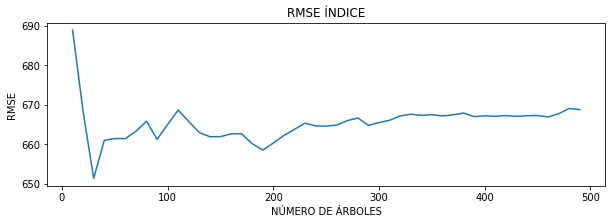

In [53]:
plt.figure(figsize=(10,3))
plt.title('RMSE ÍNDICE')
plt.xlabel('NÚMERO DE ÁRBOLES')
plt.ylabel('RMSE')
sns.lineplot(x = random_tree, y = rmse)

## MAE:

<AxesSubplot:title={'center':'MAE ÍNDICE'}, xlabel='NÚMERO DE ÁRBOLES', ylabel='MAE'>

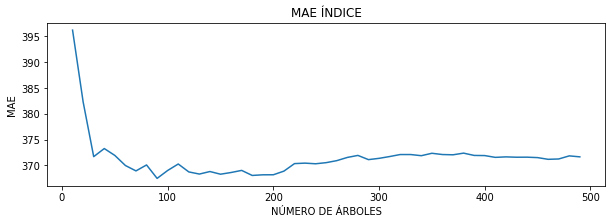

In [54]:
plt.figure(figsize=(10,3))
plt.title('MAE ÍNDICE')
plt.xlabel('NÚMERO DE ÁRBOLES')
plt.ylabel('MAE')
sns.lineplot(x = random_tree, y = mae)

## MAPE:

<AxesSubplot:title={'center':'MAPE ÍNDICE'}, xlabel='NÚMERO DE ÁRBOLES', ylabel='MAPE'>

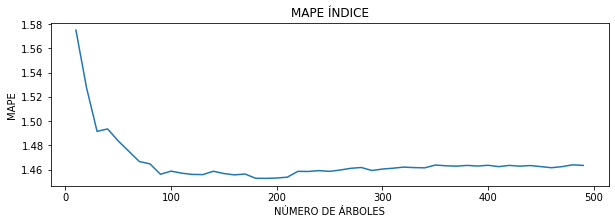

In [55]:
plt.figure(figsize=(10,3))
plt.title('MAPE ÍNDICE')
plt.xlabel('NÚMERO DE ÁRBOLES')
plt.ylabel('MAPE')
sns.lineplot(x = random_tree, y = mape)

## r2 Square:


<AxesSubplot:title={'center':'R2 ÍNDICE'}, xlabel='NÚMERO DE ÁRBOLES', ylabel='r2'>

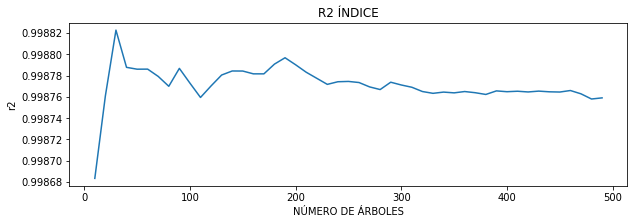

In [56]:
plt.figure(figsize=(10,3))
plt.title('R2 ÍNDICE')
plt.xlabel('NÚMERO DE ÁRBOLES')
plt.ylabel('r2')
sns.lineplot(x = random_tree, y = r_sq)

In [57]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [58]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500)]

max_features = ['auto', 'sqrt', None]

max_depth = [int(x) for x in np.linspace(5, 50, num = 45)]

max_depth.append(None)

min_samples_split = [2, 4, 6, 8, 10]

min_samples_leaf = [1, 2, 4, 6, 8, 10, 12, 14, 16, 20, 25, 30]

bootstrap = [True]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' :  min_samples_leaf,
               'bootstrap' : bootstrap}

print(random_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500], 'max_features': ['auto', 'sqrt', None], 'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, None], 'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12, 14, 16, 20, 25, 30], 'bootstrap': [True]}


In [59]:
rf = RandomForestRegressor(random_state=42)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, scoring = 'neg_mean_squared_error',
                               cv= 3, verbose = 2, random_state = 42, n_jobs =-1,
                               return_train_score = False)

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14, 15, 16, 17, 18,
                                                      19, 20, 21, 22, 23, 24,
                                                      25, 26, 27, 28, 29, 30,
                                                      31, 32, 33, 34, ...],
                                        'max_features': ['auto', 'sqrt', None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8, 10,
                                                             12, 14, 16, 20, 25,
                                                             30],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_es

## Cv nos da el nº de particiones para la cross validation. Cuanto mayor es el nº de iteraciones(n_iter) mayor búsqueda de posibilidades.
## Cuanto mayor sea el cv, mayor reducción de overfitting.

## Con el parámetro "scoring" pretendemos que nos devuelva el menor RMSE posible.

In [60]:
first_grid = rf_random.best_params_
first_grid

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 16,
 'bootstrap': True}

In [61]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True],
              'max_depth': [10, 15, 20],
              'max_features': ['auto'],
              'min_samples_leaf': [2, 4, 6],
              'min_samples_split': [5, 7, 9],
              'n_estimators' : [30, 190, 250]}


rf = RandomForestRegressor(random_state = 42)

grid_search = GridSearchCV(estimator = rf, param_grid= param_grid,
                           cv = 3, n_jobs = -1, verbose = 2, return_train_score = False, scoring = 'neg_mean_squared_error')

In [62]:
grid_search.fit(X_train, y_train);

Fitting 3 folds for each of 81 candidates, totalling 243 fits


## Nos quedamos con el modelo seleccionado del GridSearch que es el SecondGrid

In [63]:
modelo_seleccionado = grid_search.best_params_ 
modelo_seleccionado

{'bootstrap': True,
 'max_depth': 15,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 190}

In [64]:
pred = modelo_seleccionado
pred

{'bootstrap': True,
 'max_depth': 15,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 190}

In [65]:
X_test

,Open,High,Low,Volume
Date,,,,
2021-07-28,39503.187500,40816.070312,38862.437500,3.870240e+10
2019-09-22,10024.115234,10074.444336,9922.533203,1.319965e+10
2019-04-19,5298.154297,5336.680176,5233.334961,1.378024e+10
2019-10-26,8667.577148,10021.744141,8662.622070,4.449626e+10
2021-01-21,35549.398438,35552.679688,30250.750000,7.564307e+10
...,...,...,...,...
2020-10-15,11426.602539,11569.914062,11303.603516,2.448723e+10
2021-05-22,37371.031250,38831.054688,35383.683594,5.737727e+10
2020-06-28,9048.460938,9197.546875,8975.525391,1.456087e+10


In [66]:
y_test

Date
2021-07-28    39995.906250
2019-09-22    10070.392578
2019-04-19     5303.812500
2019-10-26     9244.972656
2021-01-21    30825.699219
                  ...     
2020-10-15    11495.349609
2021-05-22    37536.632812
2020-06-28     9143.582031
2021-11-24    56280.425781
2021-09-07    46811.128906
Name: Close, Length: 347, dtype: float64

In [70]:
bitcoin_df

,Open,High,Low,Close,Volume
Date,,,,,
2018-12-31,3866.839111,3868.742920,3725.867432,3742.700439,4.661841e+09
2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,4.324201e+09
2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,5.244857e+09
2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,4.530215e+09
2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,4.847965e+09
...,...,...,...,...,...
2022-02-24,37278.566406,38968.839844,34459.218750,38332.609375,4.638380e+10
2022-02-25,38333.746094,39630.324219,38111.343750,39214.218750,2.654560e+10
2022-02-26,39213.082031,40005.347656,38702.535156,39105.148438,1.746755e+10


In [ ]:
# Vamos a declarar una variable para implementar una media móvil a corto plazo de 20 días.
MA20 = close.rolling(20).mean()
# Vamos a declarar una variable para implementar una media móvil a largo plazo de 50 días.
MA50 = close.rolling(50).mean()
# Vamos a declarar una variable para implementar una media móvil a largo plazo de 100 días.
MA100 = close.rolling(100).mean()
# Hacemos un subplot de todos los gráficos con sus medias móviles de 50 días.

fig, axs = plt.subplots(2,2,figsize=(20,8),gridspec_kw ={'hspace': 0.2, 'wspace': 0.1})
axs[0,0].plot(close, label= 'closing')
axs[0,0].plot(MA50[bitcoin_df['Close']], label= 'MA50')
axs[0,0].set_title('BNB')
axs[0,0].legend()
axs[0,1].plot(close, label= 'closing')
axs[0,1].plot(MA50[bitcoin_df['Close']], label= 'MA50')
axs[0,1].set_title('BTC')
axs[0,1].legend()
axs[1,0].plot(close, label= 'closing')
axs[1,0].plot(MA50[bitcoin_df['Close']], label= 'MA50')
axs[1,0].set_title('ETH')
axs[1,0].legend()
axs[1,1].plot(close, label= 'closing')
axs[1,1].plot(MA50[bitcoin_df['Close']], label= 'MA50')
axs[1,1].set_title('ADA')
axs[1,1].legend()
plt.show()